In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import seaborn as sns
import numpy as np

In [211]:
alcohol_data_load= Path("Resources/Alcohol_Consumption_2016.csv")
happiness_data_load= Path("Resources/WHR2016.csv")

In [212]:
alcohol_data = pd.read_csv(alcohol_data_load)
happiness_data = pd.read_csv(happiness_data_load)

In [213]:
# alcohol_data.head()

In [214]:
# happiness_data.head()

In [215]:
# Merging datasets by country
alcohol_data.rename(columns={'country': 'Country'}, inplace=True)
merged_data = pd.merge(alcohol_data, happiness_data, on='Country', how='inner')
merged_data.head()

,Country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,...,5.517,5.437,5.597,1.27964,1.05163,0.68098,0.41511,0.18519,0.08423,1.81985
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,...,5.813,5.734,5.892,1.26920,1.06411,0.64674,0.18929,0.01820,0.02025,2.60525
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,...,6.596,6.515,6.677,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,2.96211
3,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,...,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931
4,Nigeria,13.4,9.6,3.8,7.9,0.4,0.6,91.1,13.0,12.5,...,4.875,4.750,5.000,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586


In [216]:
## Keeping data I need
relevant_columns = ['total_consumption','Happiness Rank', 'beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage', 'Happiness Score']
clean_data=merged_data[relevant_columns]
clean_data.head()

,total_consumption,Happiness Rank,beer_percentage,wine_percentage,spirits_percentage,other_percentage,Happiness Score
0,16.9,72,32.7,7.4,50.3,9.6,5.517
1,15.0,60,43.6,7.3,37.1,12.1,5.813
2,14.3,27,53.3,21.3,25.4,0.0,6.596
3,13.4,16,52.6,28.4,18.9,0.0,6.994
4,13.4,103,7.9,0.4,0.6,91.1,4.875


In [217]:
top_10_happiness = merged_data.nlargest(10, 'Happiness Score')

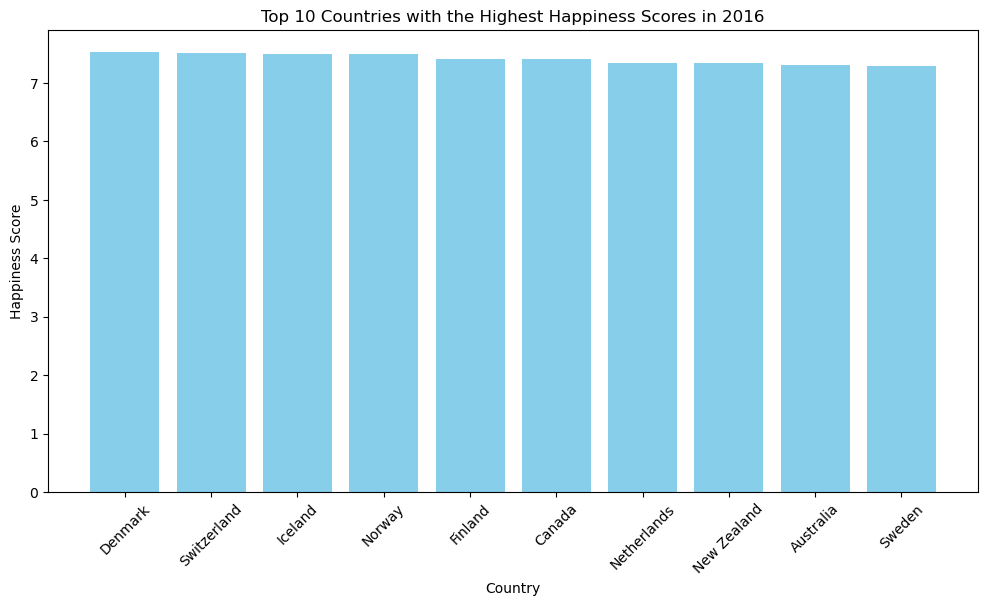

In [218]:
#Bar chart Top 10 countries with higher happiness score
plt.figure(figsize=(12, 6))
plt.bar(top_10_happiness['Country'], top_10_happiness['Happiness Score'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Countries with the Highest Happiness Scores in 2016')
plt.xticks(rotation=45)
plt.savefig('chart1.png')
plt.show()


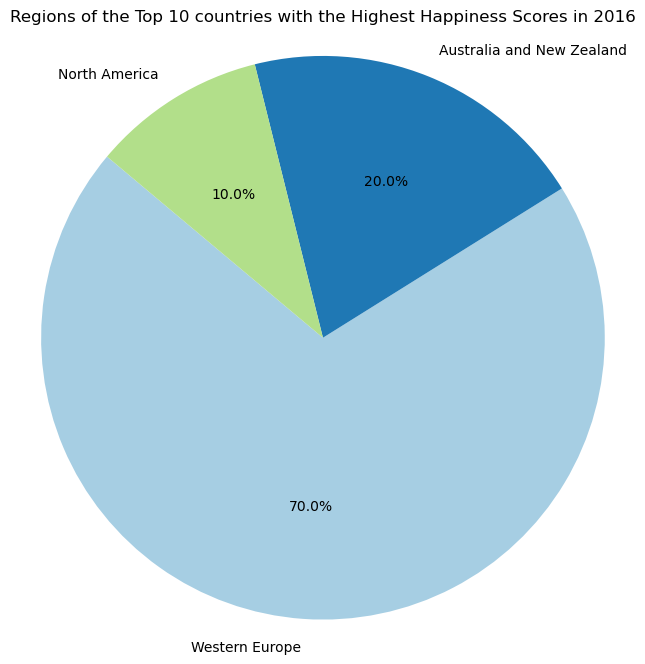

In [219]:
#pie chart by region
region_counts = top_10_happiness['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Regions of the Top 10 countries with the Highest Happiness Scores in 2016')
plt.axis('equal')
plt.savefig('chart2.png')
plt.show()


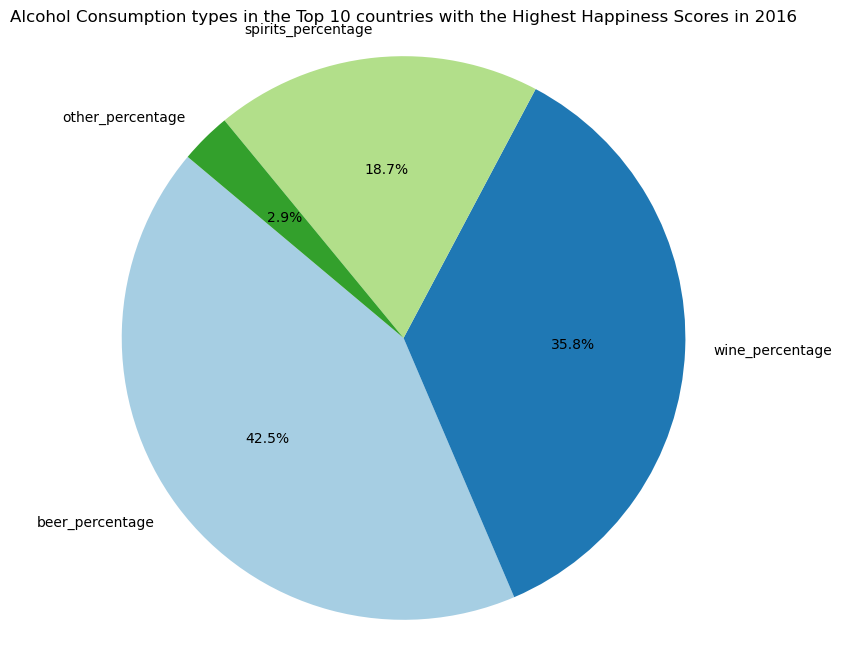

In [220]:
#pie chart per type alcohol
alcohol_types = ['beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage']
total_alcohol_consumption = top_10_happiness[alcohol_types].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_alcohol_consumption, labels=total_alcohol_consumption.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Alcohol Consumption types in the Top 10 countries with the Highest Happiness Scores in 2016')
plt.axis('equal')
plt.savefig('chart3.png')
plt.show()


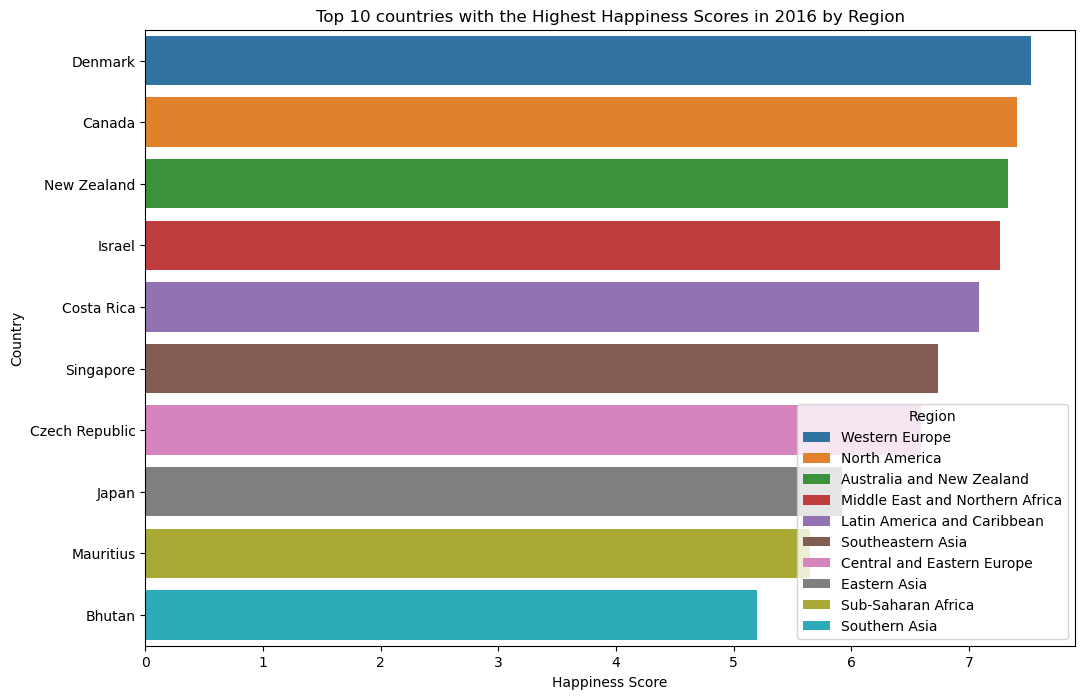

In [221]:
#Happiness score per region

max_happiness_by_region = clean_data_with_region.loc[clean_data_with_region.groupby('Region')['Happiness Score'].idxmax()]
max_happiness_by_region = max_happiness_by_region[['Region', 'Country', 'Happiness Score']].sort_values(by='Happiness Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=max_happiness_by_region, x='Happiness Score', y='Country', hue='Region', dodge=False)
plt.title('Top 10 countries with the Highest Happiness Scores in 2016 by Region')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(title='Region')
plt.savefig('chart4.png')
plt.show()


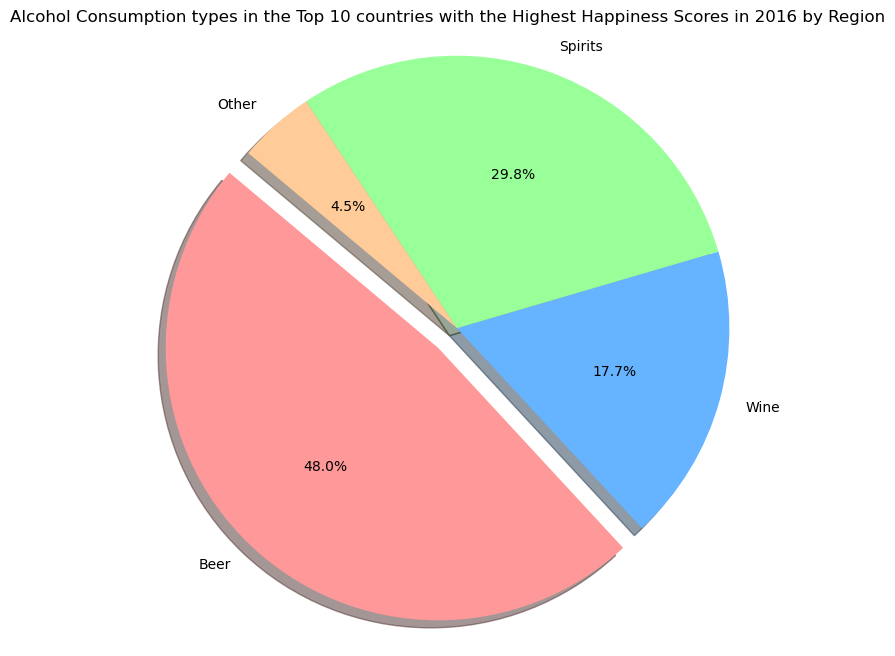

In [222]:
#Pie chart max per region
alcohol_percentages = clean_data_with_region[['Country', 'beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage']]
max_happiness_with_alcohol = pd.merge(max_happiness_by_region, alcohol_percentages, on='Country')

total_beer_percentage = max_happiness_with_alcohol['beer_percentage'].sum()
total_wine_percentage = max_happiness_with_alcohol['wine_percentage'].sum()
total_spirits_percentage = max_happiness_with_alcohol['spirits_percentage'].sum()
total_other_percentage = max_happiness_with_alcohol['other_percentage'].sum()

labels = ['Beer', 'Wine', 'Spirits', 'Other']
sizes = [total_beer_percentage, total_wine_percentage, total_spirits_percentage, total_other_percentage]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0)  # solo "explode" el primer pedazo (Cerveza)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Alcohol Consumption types in the Top 10 countries with the Highest Happiness Scores in 2016 by Region')
plt.axis('equal')  # Para asegurar que el pie chart sea un círculo.
plt.savefig('chart5.png')
plt.show()


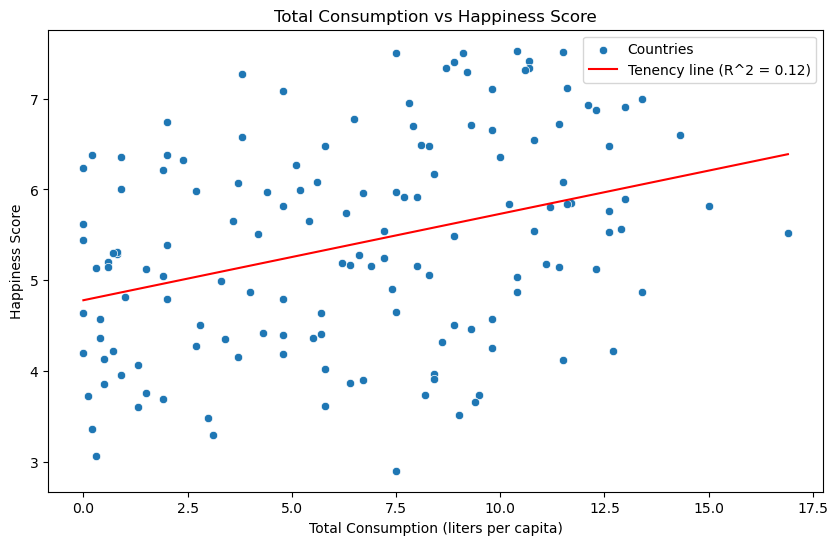

In [223]:
Q1_total_consumption = clean_data['total_consumption'].quantile(0.25)
Q3_total_consumption = clean_data['total_consumption'].quantile(0.75)
IQR_total_consumption = Q3_total_consumption - Q1_total_consumption

Q1_happiness_score = clean_data['Happiness Score'].quantile(0.25)
Q3_happiness_score = clean_data['Happiness Score'].quantile(0.75)
IQR_happiness_score = Q3_happiness_score - Q1_happiness_score


filtered_data = clean_data[
    (clean_data['total_consumption'] >= (Q1_total_consumption - 1.5 * IQR_total_consumption)) & 
    (clean_data['total_consumption'] <= (Q3_total_consumption + 1.5 * IQR_total_consumption)) & 
    (clean_data['Happiness Score'] >= (Q1_happiness_score - 1.5 * IQR_happiness_score)) & 
    (clean_data['Happiness Score'] <= (Q3_happiness_score + 1.5 * IQR_happiness_score))
]

X = filtered_data['total_consumption'].values
y = filtered_data['Happiness Score'].values

#Tendency line
slope, intercept = np.polyfit(X, y, 1)
y_pred = slope * X + intercept

# Calculate R^2
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_consumption', y='Happiness Score', data=clean_data, label='Countries')


plt.plot(X, y_pred, color='red', label=f'Tenency line (R^2 = {r2:.2f})')

plt.title('Total Consumption vs Happiness Score')
plt.xlabel('Total Consumption (liters per capita)')
plt.ylabel('Happiness Score')
plt.legend()
plt.savefig('chart6.png')
plt.show()




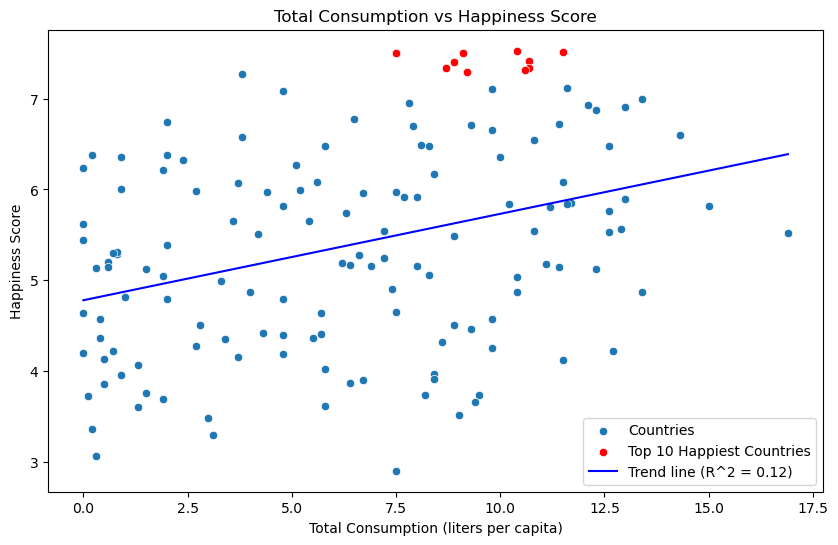

In [224]:
#Adding top happiness
top_10_happiness = merged_data.nlargest(10, 'Happiness Score')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_consumption', y='Happiness Score', data=filtered_data, label='Countries')

sns.scatterplot(x='total_consumption', y='Happiness Score', data=top_10_happiness, color='red', label='Top 10 Happiest Countries')

plt.plot(X, y_pred, color='blue', label=f'Trend line (R^2 = {r2:.2f})')

plt.title('Total Consumption vs Happiness Score')
plt.xlabel('Total Consumption (liters per capita)')
plt.ylabel('Happiness Score')
plt.legend()
plt.savefig('chart7.png')
plt.show()


In [225]:
statistics = top_10_happiness[['Happiness Score', 'total_consumption']].describe()
statistics

,Happiness Score,total_consumption
count,10.000000,10.000000
mean,7.412800,9.730000
std,0.090453,1.230221
min,7.291000,7.500000
25%,7.335250,8.950000
50%,7.408500,9.800000
75%,7.500250,10.675000
max,7.526000,11.500000


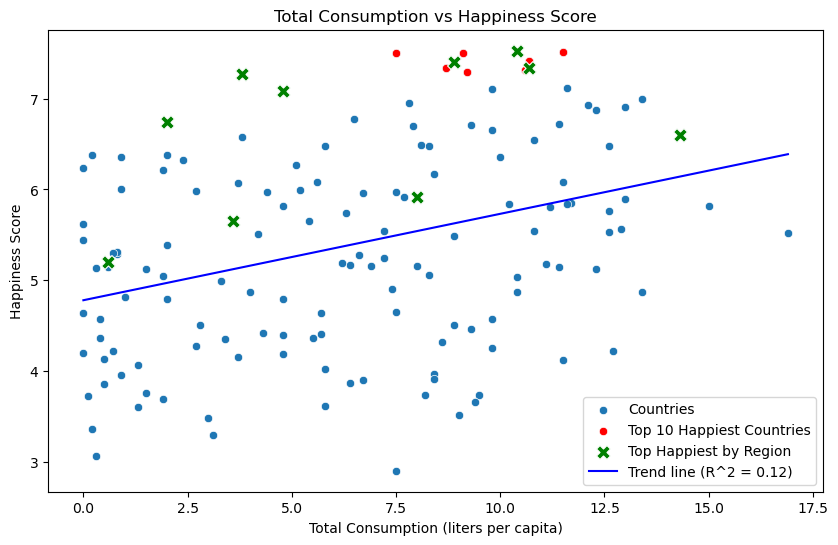

In [226]:
#Adding max happiness per region
top_10_happiness = merged_data.nlargest(10, 'Happiness Score')

max_happiness_by_region = merged_data.loc[merged_data.groupby('Region')['Happiness Score'].idxmax()]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_consumption', y='Happiness Score', data=filtered_data, label='Countries')

sns.scatterplot(x='total_consumption', y='Happiness Score', data=top_10_happiness, color='red', label='Top 10 Happiest Countries')

sns.scatterplot(x='total_consumption', y='Happiness Score', data=max_happiness_by_region, color='green', s=100, label='Top Happiest by Region', marker='X')

plt.plot(X, y_pred, color='blue', label=f'Trend line (R^2 = {r2:.2f})')

plt.title('Total Consumption vs Happiness Score')
plt.xlabel('Total Consumption (liters per capita)')
plt.ylabel('Happiness Score')
plt.legend()
plt.savefig('chart8.png')
plt.show()
